In [130]:
import pandas as pd
import numpy as np

In [131]:
df = pd.read_csv(r'D:\Machine Learning\ML Projects\Toy Project\placement-dataset.csv')

In [132]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model 

In [133]:
#Preprocessing

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [135]:
df = df.iloc[:,1:]

In [136]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [137]:
df.shape

(100, 3)

In [138]:
#EDA

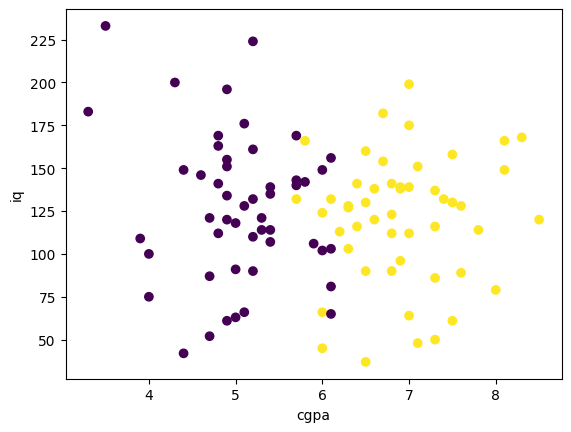

In [139]:
import matplotlib.pyplot as plt
plt.scatter(x='cgpa',y='iq',data=df,c=df['placement'])
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.show()

In [140]:
#Extract input and output cols

In [141]:
x = df.iloc[:,0:2]
y = df.iloc[:,2:3]

In [142]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [143]:
# 3. Train test split
from sklearn.model_selection import train_test_split 
train_test_split(x,y,test_size=0.2)

[    cgpa     iq
 24   4.7  121.0
 27   6.0  124.0
 34   4.8  163.0
 38   6.5  160.0
 61   7.3  137.0
 ..   ...    ...
 82   6.5   37.0
 5    7.1   48.0
 18   4.0  100.0
 97   6.7  182.0
 48   6.6  138.0
 
 [80 rows x 2 columns],
     cgpa     iq
 95   4.3  200.0
 40   4.9  134.0
 3    7.4  132.0
 50   3.5  233.0
 98   6.3  103.0
 71   6.1  132.0
 31   3.9  109.0
 14   6.1  103.0
 84   5.7  169.0
 52   7.0  175.0
 69   8.5  120.0
 54   6.4  141.0
 90   7.3   86.0
 32   7.0  139.0
 96   4.4   42.0
 9    5.1   66.0
 86   5.1  128.0
 28   5.2   90.0
 36   5.7  140.0
 92   5.2  110.0,
     placement
 24          0
 27          1
 34          0
 38          1
 61          1
 ..        ...
 82          1
 5           1
 18          0
 97          1
 48          1
 
 [80 rows x 1 columns],
     placement
 95          0
 40          0
 3           1
 50          0
 98          1
 71          1
 31          0
 14          0
 84          0
 52          1
 69          1
 54          1
 90        

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
sc = StandardScaler()

In [147]:
x_train = sc.fit_transform(x_train)

In [148]:
x_train

array([[ 0.10028495, -0.5078328 ],
       [ 0.27725839,  0.11655179],
       [-1.05004242, -0.28305435],
       [ 0.01179823, -1.43192199],
       [-1.05004242,  1.14054252],
       [ 0.89666544, -0.28305435],
       [-1.40398931, -2.0313312 ],
       [ 0.36574511,  0.44123178],
       [ 2.04699281,  1.11556714],
       [ 1.1621256 ,  0.34133024],
       [-0.69609554, -0.33300512],
       [ 2.22396625, -0.08325128],
       [-0.16517521,  1.06561637],
       [-0.9615557 , -1.55679891],
       [-0.5191221 ,  0.29137948],
       [-0.9615557 ,  0.69098561],
       [ 0.01179823, -1.95640505],
       [ 0.01179823,  0.01665026],
       [-0.87306898, -1.50684815],
       [ 1.87001937,  0.64103485],
       [ 0.01179823, -0.53280818],
       [ 0.719692  , -0.00832513],
       [ 1.33909904,  0.8658133 ],
       [ 1.33909904, -1.55679891],
       [-0.25366193,  0.21645332],
       [ 0.18877167, -0.25807896],
       [-0.87306898, -0.8075374 ],
       [-1.49247603,  1.91477941],
       [ 0.10028495,

In [149]:
x_text = sc.transform(x_test)

In [150]:
x_test.head()

,cgpa,iq
32,7.0,139.0
15,5.1,176.0
70,6.3,127.0
47,5.2,161.0
39,4.6,146.0


In [151]:
# Train the model

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
clf = LogisticRegression()

In [154]:
clf.fit(x_train,y_train)

c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [155]:
# Evaluate the model

In [156]:
y_pred = clf.predict(x_test)

c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [157]:
from sklearn.metrics import accuracy_score

In [158]:
accuracy_score(y_test,y_pred)

0.5

In [159]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

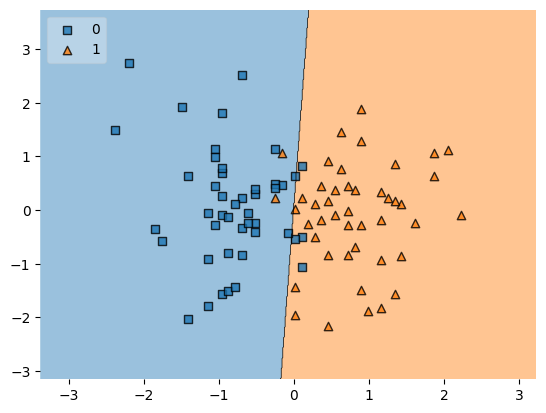

In [161]:
plot_decision_regions(x_train,y_train.iloc[:, 0].values, clf=clf, legend=2)

In [31]:
import pickle

In [32]:
pickle.dump(clf,open('model.pkl','wb'))